# The folowing program plots a ROC curve for a fully determined system (without using any Machine Learning).

In [2]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operator, pixel manipulation, etc.

import matplotlib.image as mpimg 
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
import sys

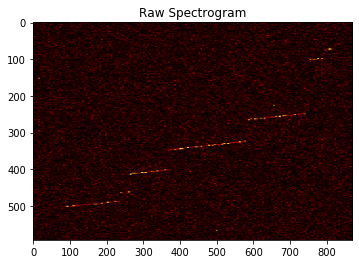

In [4]:
spec = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\spectrogram2.png");
plt.imshow(spec),plt.title('Raw Spectrogram')
plt.show()

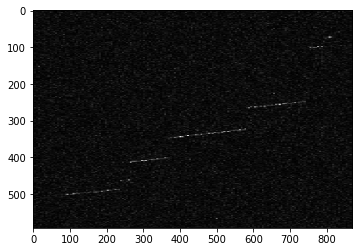

In [11]:
# Convert color image to grayscale to help extraction of edges

gray = np.dot(spec, [1,1,1])
plt.imshow(gray ,cmap = plt.get_cmap('gray'));

In [12]:
gray.shape

(593, 871)

In [13]:
for i in range(0, gray.shape[0]-1):
    for j in range(0, gray.shape[1]-1):
        gray[i][j]=gray[i][j]*20

The above code calculates the maximum and minimum of pixel intensities.

In [17]:
sum=0
sum_max=0
avg=0
for i in range(0, gray.shape[0]-1):
    for j in range(0, gray.shape[1]-1):
        sum=sum+gray[i][j]
        if gray[i][j]>sum_max:
            sum_max=gray[i][j]

print("maximum:",sum_max)  
print("average:",(sum/(gray.shape[0]*gray.shape[1])))

maximum: 55.13725519180298
average: 2.7195105015318086


In [20]:
cols=871
rows=593
true=[[0 for i in range(cols)] for j in range(rows)] 

Now we shall set a theshold of 45 and perform a binary classification (A very simple task).

We shall also calculate the total positive values and total negative values.

In [21]:
pos_tot=0
neg_tot=0
for i in range(0, gray.shape[0]-1):
    for j in range(0, gray.shape[1]-1):
        if (gray[i][j]>45):
            true[i][j]=1
            pos_tot=pos_tot+1
        else:
            neg_tot=neg_tot+1

In [22]:
cols=871
rows=593
test=[[0 for i in range(cols)] for j in range(rows)] 

We shall initialise the 4 variables which we will calculate: True Positive(TP), False Positive(FP), True Negative(TN), False Negative(FN)

In [29]:
TP=0 
FP=0
TN=0
FN=0
TPR=[0 for i in range(0,28)]
FPR=[0 for i in range(0,28)]
s=0

In [30]:
for th in range(0,56,2):
    TP=0 
    FP=0
    TN=0
    FN=0
    for i in range(0, gray.shape[0]-1):
        for j in range(0, gray.shape[1]-1):       
            if (gray[i][j]>th):
                test[i][j]=1
                if (test[i][j]== true[i][j]):
                    TP=TP+1
                else:
                    FP=FP+1
            
            
            elif (gray[i][j]<th):  
                test[i][j]=0
                if (test[i][j]== true[i][j]):
                    TN=TN+1
                else:
                    FN=FN+1 
    
    
    
    FPR[s]=FP/(FP+TN) 
    TPR[s]=TP/(TP+FN)
    s=s+1

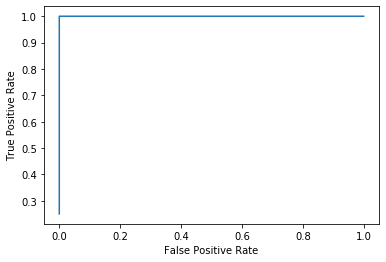

In [36]:
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()